In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gdp-per-country-20202025/2020-2025.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df=pd.read_csv('/kaggle/input/gdp-per-country-20202025/2020-2025.csv')
df.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0
5,Antigua and Barbuda,1412,1602.0,1867.0,2006.0,2225.0,2373.0
6,Argentina,385218,486040.0,632318.0,645511.0,632145.0,683533.0
7,Armenia,12642,13879.0,19514.0,24086.0,25533.0,26258.0
8,Aruba,2486,2929.0,3279.0,3649.0,3952.0,4100.0
9,Australia,1362613,1655843.0,1725461.0,1742461.0,1796805.0,1771681.0


# Basic Information of Dataset

In [4]:
df.shape

(196, 7)

In [5]:
print(df.index)
print(df.columns)
print(df.info())

RangeIndex(start=0, stop=196, step=1)
Index(['Country', '2020', '2021', '2022', '2023', '2024', '2025'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  196 non-null    object 
 1   2020     196 non-null    int64  
 2   2021     194 non-null    float64
 3   2022     194 non-null    float64
 4   2023     194 non-null    float64
 5   2024     192 non-null    float64
 6   2025     189 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.8+ KB
None


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
2020,196.0,437888.637755,1.942936e+06,52.0,9588.00,35334.5,207481.00,21354125.0
2021,194.0,504350.438144,2.220864e+06,62.0,11141.75,37719.0,254613.25,23681175.0
2022,194.0,525506.381443,2.347886e+06,61.0,12650.00,41568.0,274630.75,26006900.0
2023,194.0,548617.283505,2.453040e+06,63.0,13604.50,43631.0,285035.50,27720725.0
2024,192.0,575687.072917,2.573189e+06,65.0,13500.50,47135.5,291510.75,29184900.0
2025,189.0,599141.449735,2.693421e+06,65.0,14214.00,47829.0,303293.00,30507217.0


# Data Cleaning Process

In [7]:
df.isnull().sum()

Country    0
2020       0
2021       2
2022       2
2023       2
2024       4
2025       7
dtype: int64

In [8]:
mean_21=df['2021'].mean()
mean_22=df['2022'].mean()
mean_23=df['2023'].mean()
mean_24=df['2024'].mean()
mean_25=df['2025'].mean()


In [9]:
#fill the null values with the mean
df['2021']=df['2021'].fillna(mean_21,axis=0)
df['2022']=df['2022'].fillna(mean_22,axis=0)
df['2023']=df['2023'].fillna(mean_23,axis=0)
df['2024']=df['2024'].fillna(mean_24,axis=0)
df['2025']=df['2025'].fillna(mean_25,axis=0)
df.head()

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,575687.072917,599141.449735
1,Albania,15271,18086.0,19185.0,23388.0,27259.000000,28372.000000
2,Algeria,164774,185850.0,225709.0,247789.0,264913.000000,268885.000000
3,Andorra,2885,3325.0,3376.0,3786.0,4038.000000,4035.000000
4,Angola,66521,84375.0,142442.0,109764.0,115946.000000,113343.000000


In [10]:
df.isnull().sum()

Country    0
2020       0
2021       0
2022       0
2023       0
2024       0
2025       0
dtype: int64

Text(116.24999999999999, 0.5, 'Years')

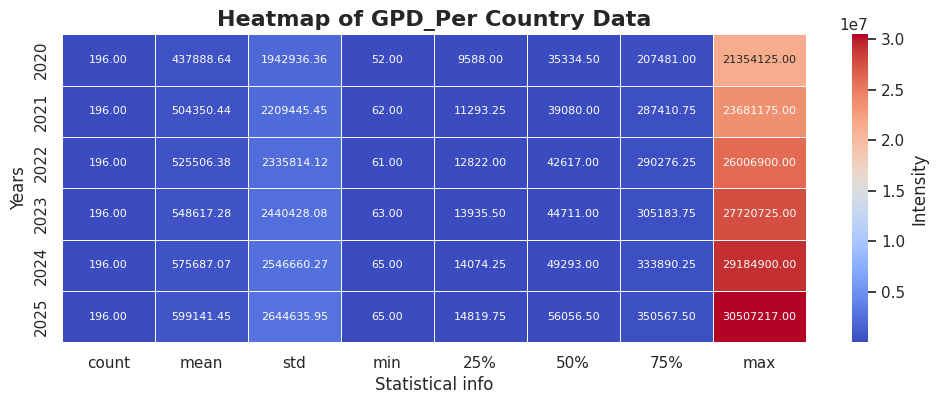

In [11]:
sns.set_theme(style="white")
plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    df.describe().T,
    cmap="coolwarm",              
    linewidths=0.5,               
    linecolor='white',
    annot=True,                 
    fmt=".2f",                 
    annot_kws={"size": 8},        
    cbar_kws={'label': 'Intensity'},
    square=False
)
plt.title("Heatmap of GPD_Per Country Data", fontsize=16, weight='bold')
plt.xlabel("Statistical info", fontsize=12)
plt.ylabel("Years", fontsize=12)

# Data Visulaztion process

In [12]:
#Bar Chart – Top 10 GDP (2025)
df_2025 = df[['Country', '2025']].sort_values(by='2025', ascending=False)
top_10 = df_2025.head(10)

fig_bar_top = px.bar(top_10, x='Country', y='2025', title='Top 10 Countries by GDP in 2025', text='2025')
fig_bar_top.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_bar_top.update_layout(yaxis_title='GDP', xaxis_title='Country')
fig_bar_top.show()

In [13]:
#  Bar Chart – Bottom 10 GDP (2025)
bottom_10 = df_2025.tail(10)

fig_bar_bottom = px.bar(bottom_10, x='Country', y='2025', title='Bottom 10 Countries by GDP in 2025', text='2025', color_discrete_sequence=["crimson"])
fig_bar_bottom.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_bar_bottom.update_layout(yaxis_title='GDP', xaxis_title='Country')
fig_bar_bottom.show()

In [14]:
#  Scatter Plot – 2020 vs 2025
fig_scatter = px.scatter(df, x='2020', y='2025', text='Country',
                         size='2025', color='Country',
                         title='GDP: 2020 vs 2025 Growth')
fig_scatter.update_traces(textposition='top center')
fig_scatter.show()

In [15]:
#Heatmap – Correlation
df_corr = df.drop(columns='Country').corr()

fig_heatmap = px.imshow(df_corr, text_auto=True, color_continuous_scale='RdBu_r', title='Correlation Between Years')
fig_heatmap.show()

# Data Preprocessing Techniques
#### Because the model become working fast

In [16]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [17]:
# convert country data into numerical format
label_encoder = LabelEncoder()
df['Country_encoded'] = label_encoder.fit_transform(df['Country'])

In [18]:
# Apply Standard Scaling or MinMax Scaling to numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_cols])

In [19]:
# Convert scaled features to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=[f"{col}_scaled" for col in numeric_cols])
scaled_df.head()

,2020_scaled,2021_scaled,2022_scaled,2023_scaled,2024_scaled,2025_scaled
0,-0.215562,-0.222376,-0.219330,-0.218294,0.000000,0.000000
1,-0.218072,-0.220648,-0.217320,-0.215771,-0.215903,-0.216374
2,-0.140928,-0.144523,-0.128677,-0.123584,-0.122345,-0.125198
3,-0.224463,-0.227346,-0.224105,-0.223824,-0.225045,-0.225600
4,-0.191627,-0.190569,-0.164416,-0.180287,-0.180989,-0.184162


# Data Splitting process

In [20]:
X=scaled_df.iloc[:,:-1]
y=scaled_df['2025_scaled']


In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((156, 5), (40, 5), (156,), (40,))

In [22]:
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
print(lin_reg)
print(rf_reg)

LinearRegression()
RandomForestRegressor(random_state=42)


In [23]:
lin_reg.fit(x_train, y_train)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
y_pred_lin = lin_reg.predict(x_test)
y_pred_rf = rf_reg.predict(x_test)

In [25]:
print('Prediction by use of Linear Regression Model:')
y_pred_lin

Prediction by use of Linear Regression Model:


array([-0.10347209, -0.22638416, -0.19914557, -0.13631737, -0.17043165,
        1.21474271, -0.21608302, -0.20963252, -0.22519663,  0.01171196,
       -0.22587532, -0.2237217 , -0.18778961,  1.01826892, -0.21697364,
       -0.21924451, -0.22614759,  0.47573073, -0.21174207, -0.19404946,
        0.53384333, -0.21933725,  0.13913072, -0.08807658,  1.27094217,
       -0.22601803, -0.21991143, -0.02293949, -0.20779836, -0.18166999,
       -0.01693358, -0.20330191, -0.15174673,  0.64915055, -0.04427406,
       -0.20923504, -0.22454201, -0.21809658, -0.20966224, -0.21315833])

In [26]:
print('Prediction by use of Random Forest Model:')
y_pred_rf

Prediction by use of Random Forest Model:


array([-1.06432564e-01, -2.26942533e-01, -1.96385019e-01, -1.38949216e-01,
       -1.76400518e-01,  1.12841835e+00, -2.16998289e-01, -2.09993200e-01,
       -2.25898877e-01,  1.70919990e-04, -2.26367276e-01, -2.24260918e-01,
       -1.89578066e-01,  1.03935446e+00, -2.17321276e-01, -2.20162575e-01,
       -2.26690664e-01,  4.69730024e-01, -2.13487899e-01, -1.93948282e-01,
        4.10466747e-01, -2.21001313e-01,  6.49605928e-02, -7.20015521e-02,
        1.37359343e+00, -2.26599386e-01, -2.20529521e-01, -1.83895886e-02,
       -2.09280044e-01, -1.80684260e-01, -1.50522881e-02, -1.97926070e-01,
       -1.54829487e-01,  5.65122386e-01, -4.47878198e-02, -2.09934168e-01,
       -2.24978703e-01, -2.19065418e-01, -2.09907021e-01, -2.14088465e-01])

In [27]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"📈 {name} Performance:")
    print(f"   - MAE : {mae:.4f}")
    print(f"   - RMSE: {rmse:.4f}")
    print(f"   - R²  : {r2:.4f}\n")
    return mae, rmse, r2

In [28]:
mae_lin, rmse_lin, r2_lin = evaluate_model("Linear Regression", y_test, y_pred_lin)
mae_rf, rmse_rf, r2_rf = evaluate_model("Random Forest", y_test, y_pred_rf)

📈 Linear Regression Performance:
   - MAE : 0.0150
   - RMSE: 0.0402
   - R²  : 0.9896

📈 Random Forest Performance:
   - MAE : 0.0136
   - RMSE: 0.0375
   - R²  : 0.9909



/tmp/ipykernel_13/1634140587.py:11: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.



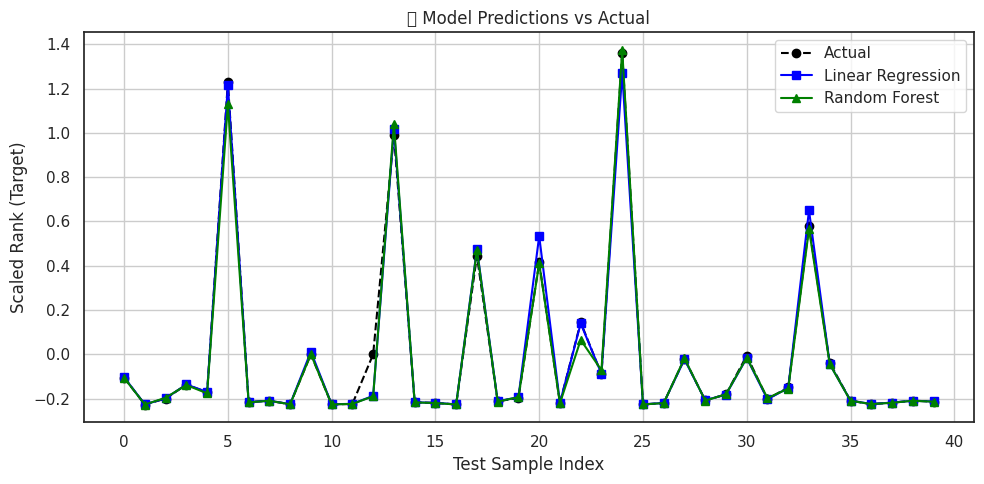

In [29]:
# Plot Predictions vs Actuals
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual", marker='o', linestyle='--', color='black')
plt.plot(y_pred_lin, label="Linear Regression", marker='s', color='blue')
plt.plot(y_pred_rf, label="Random Forest", marker='^', color='green')
plt.title("🔍 Model Predictions vs Actual")
plt.xlabel("Test Sample Index")
plt.ylabel("Scaled Rank (Target)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()